In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings; warnings.filterwarnings('ignore')

In [2]:
#Loading original dataset
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
#Loading generated dataset
df2 = pd.read_csv('bankchurndata2.csv')

In [4]:
df2

,credit_score,age,balance,estimated_salary,churn
0,410.0,0.0,0.0,477.0,1
1,372.0,48.0,500.0,0.0,0
2,373.0,48.0,500.0,0.0,0
3,374.0,48.0,500.0,0.0,0
4,375.0,48.0,500.0,0.0,0
...,...,...,...,...,...
9995,0.0,0.0,271.0,331.0,1
9996,0.0,0.0,271.0,332.0,1
9997,0.0,0.0,271.0,333.0,1
9998,0.0,0.0,271.0,334.0,1


In [5]:
#Removing unwanted columns
df = df.drop(columns=['customer_id', 'country', 'gender', 'tenure', 'products_number', 'credit_card', 'active_member'])

In [6]:
df

,credit_score,age,balance,estimated_salary,churn
0,619,42,0.00,101348.88,1
1,608,41,83807.86,112542.58,0
2,502,42,159660.80,113931.57,1
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,0
...,...,...,...,...,...
9995,771,39,0.00,96270.64,0
9996,516,35,57369.61,101699.77,0
9997,709,36,0.00,42085.58,1
9998,772,42,75075.31,92888.52,1


In [7]:
df.shape

(10000, 5)

In [8]:
df.describe()


,credit_score,age,balance,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881,0.203700
std,96.653299,10.487806,62397.405202,57510.492818,0.402769
min,350.000000,18.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,97198.540000,100193.915000,0.000000
75%,718.000000,44.000000,127644.240000,149388.247500,0.000000
max,850.000000,92.000000,250898.090000,199992.480000,1.000000


In [9]:
#Extracting and analysing through isolation forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(df)
df2['is_inlier_IF'] = iso_forest.predict(df2)

In [10]:
inliers_IF = df2[df2['is_inlier_IF'] == 1]
outliers_IF = df2[df2['is_inlier_IF'] == -1]

In [11]:
outliers_IF

,credit_score,age,balance,estimated_salary,churn,is_inlier_IF
0,410.0,0.0,0.0,477.0,1,-1
1,372.0,48.0,500.0,0.0,0,-1
2,373.0,48.0,500.0,0.0,0,-1
3,374.0,48.0,500.0,0.0,0,-1
4,375.0,48.0,500.0,0.0,0,-1
...,...,...,...,...,...,...
9995,0.0,0.0,271.0,331.0,1,-1
9996,0.0,0.0,271.0,332.0,1,-1
9997,0.0,0.0,271.0,333.0,1,-1
9998,0.0,0.0,271.0,334.0,1,-1


In [12]:
inliers_IF

,credit_score,age,balance,estimated_salary,churn,is_inlier_IF


In [13]:
def is_inlier(row):
    # Age constraint: age >= 18
    if row['age'] < 18:
        #print(f"Invalid age: {row['age']}")
        return -1
    
    # Balance constraint: balance >= 0
    if row['balance'] < 0:
        return -1
    
    # Estimated Salary constraint: estimated_salary >= 0
    if row['estimated_salary'] < 0:
        return -1
    
    # Credit Score constraint: 300 < credit_score < 850
    if row['credit_score'] < 300 or row['credit_score'] > 850:
        return -1

    # Churn constraint: churn must be either 0 or 1
    if row['churn'] not in [0, 1]:
        return -1
    
    # If all constraints are satisfied, return 1
    return 1

In [14]:
#Extracting and analysing through human-written constraints
df2['is_inlier_HW'] = df2.apply(is_inlier, axis=1)

In [15]:
inliers_HW = df2[df2['is_inlier_HW'] == 1]
outliers_HW = df2[df2['is_inlier_HW'] == -1]
outliers_HW

,credit_score,age,balance,estimated_salary,churn,is_inlier_IF,is_inlier_HW
0,410.0,0.0,0.0,477.0,1,-1,-1
201,299.0,64.0,500.0,0.0,0,-1,-1
202,298.0,64.0,500.0,0.0,0,-1,-1
203,297.0,64.0,500.0,0.0,0,-1,-1
204,296.0,64.0,500.0,0.0,0,-1,-1
...,...,...,...,...,...,...,...
9995,0.0,0.0,271.0,331.0,1,-1,-1
9996,0.0,0.0,271.0,332.0,1,-1,-1
9997,0.0,0.0,271.0,333.0,1,-1,-1
9998,0.0,0.0,271.0,334.0,1,-1,-1


In [16]:
inliers_HW

,credit_score,age,balance,estimated_salary,churn,is_inlier_IF,is_inlier_HW
1,372.0,48.0,500.0,0.0,0,-1,1
2,373.0,48.0,500.0,0.0,0,-1,1
3,374.0,48.0,500.0,0.0,0,-1,1
4,375.0,48.0,500.0,0.0,0,-1,1
5,376.0,48.0,500.0,0.0,0,-1,1
...,...,...,...,...,...,...,...
196,304.0,64.0,500.0,0.0,0,-1,1
197,303.0,64.0,500.0,0.0,0,-1,1
198,302.0,64.0,500.0,0.0,0,-1,1
199,301.0,64.0,500.0,0.0,0,-1,1


In [17]:
#disagreements between two methods
df2['similar'] = abs(df2['is_inlier_IF'] + df2['is_inlier_HW']) / 2

In [18]:
mismatch = df2[df2['similar'] == 0]
similar = df2[df2['similar'] == 1]

In [19]:
#writing the disagreed datapoints into csv
mismatch.to_csv("disagreement.csv")

In [20]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

conf_matrix = confusion_matrix(df2['is_inlier_HW'], df2['is_inlier_IF'])
conf_matrix

array([[9800,    0],
       [ 200,    0]])

Text(95.72222222222221, 0.5, 'Handwritten')

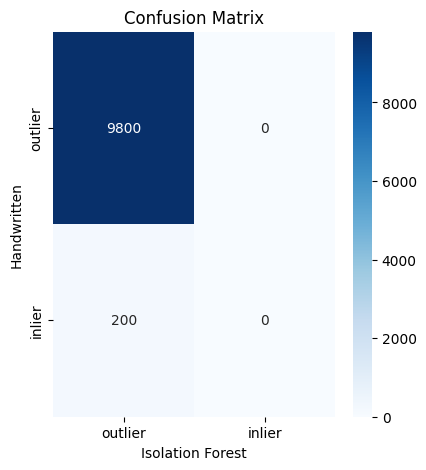

In [21]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["outlier","inlier"], yticklabels=["outlier","inlier"])
plt.title("Confusion Matrix")
plt.xlabel("Isolation Forest")
plt.ylabel("Handwritten")

In [22]:
#Both agree it is inlier
all_inlier = df2[(df2['is_inlier_IF'] == 1) & (df2['is_inlier_HW'] == 1)] 
all_inlier.to_csv("all_inlier.csv")

In [23]:
#Both agree it is outlier
all_outlier = df2[(df2['is_inlier_IF'] == -1) & (df2['is_inlier_HW'] == -1)] 
all_outlier.to_csv("all_outlier.csv")